### Project Details:

Before you start Task 1, make sure you've read through the project description in "Project_AIPR.pdf" (used for all three tasks) found in the Files page.

### Overview of Task 1

Task 1 concerns preparing the data for later use in Tasks 2 and 3.
As part of this you will:

Handle the missing values in the data.
Preprocess the attribute values into an appropriate form to be used as input to an algorithm (as described in Project_AIPR.pdf).
Visualize the data using different techniques in order to get a sense of what it contains.
Files provided for Task 1

Task 1 uses three existing files, none of which should be part of the final submission.
Kumar2018_Article_APositionAndRotationInvariantF.pdf (A reference paper for gesture recognition)
train-final.csv
test-final.csv
All of the files can be found in the Files page.

### Handle the missing values in the data

The data in "train-final.csv" and "test-final.csv" is incomplete as there are some values that are missing. Since these are .csv (Comma-Separated Values) files this will be difficult to see in a text editor as the missing values will simply show up as two commas with nothing in between them. A better way to visualize them is to use spreadsheet software like Excel or to use RapidMiner directly. Before the data can be used these missing values needs to be replaced with filler values. How you do this is up to you, but (as detailed later) the process must be detailed in the report and the procedure for selecting replacement values must be justified. Note: If you handle the data by creating new files these new files must be part of the submission.

### Preprocess the attributes

Apply any preprocessing procedures you think would help with prediction in Tasks 2 and 3. You may use several preprocessing procedures at once and even create several different "pipelines" of procedures to see how they perform in the following tasks. Any procedures created must be reported and justified in the report.

You will be allowed to change anything you do in this task for the later tasks if need be (those tasks will have more information).

### Visualize the data

Create visualization of the data before and after preprocessing. You must at least include 2 such visualizations in the report (description and images) as well as justifications for their use and what you learned about the data from them.

### Submission

The submission consists of two parts:

The project:
The RapidMiner project (or Python code/Matlab files) that contains your solution.
Any other files used that are different from those provided to you (if you edited the provided files directly those edited versions should be included).
Anything else needed to run your project (including instructions on how to do so, if it's not self-obvious).
The report:
A report detailing how you solved the task, justification for your choices (even for choices not to do something), images of the visualizations, and what those visualizations tell you about the data and preprocessing.
Additional material

The files also include a paper "Kumar2018_Article_APositionAndRotationInvariantF.pdf" which you can consult for deeper information about gesture recognition.

The files also include "combined-1.zip" which includes the raw gesture time series as described in "Project_AIPR.pdf". You don't need to use them, but they can be used for more advanced methods for handling missing values or preprocessing.

# Installing and importing dependencies
We used the following libraries in the first task:
- `pandas` to manipulate the data
- `scikit-learn` for imputing and scaling the data
- `seaborn` and `matplotlib` for visualization.

$\color{red}{\text{Can we remove this install part from the notebook?}}$


In [186]:
%pip install pandas seaborn scikit-learn

You should consider upgrading via the '/Users/paripasviktor/ltu/aipr/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [187]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# First look at the data
Let's load the training dataset from the corresponding .csv file.
Since we know that the columns represent the mean/standard deviation of the positions and angles of the 60 points, respectively, followed by the label name and code, let us rename the columns accordingly to allow for easier reading.

In [188]:
training_data = pd.read_csv('train-final.csv', header=None)

name_mappings = {
    # Feature columns
    **{i:f'positions_mean_{i}' for i in range(60)},
    **{i:f'positions_std_{i}' for i in range(60, 120)},
    **{i:f'angles_mean_{i}' for i in range(120, 180)},
    **{i:f'angles_std_{i}' for i in range(180, 240)},
    # Label columns
    **{240: 'label_name', 241: 'label_code'},
}

training_data.rename(name_mappings, axis=1, inplace=True)
training_feature_columns = training_data.columns[:-2]

Let's show some of the data

In [189]:
training_data.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239,label_name,label_code
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320,bye,5
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291,you,30
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623,thankyou,26
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313,name,20
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550,love,18


How many different labels do we have in the training dataset?

In [190]:
number_of_classes = training_data.label_name.nunique()
number_of_classes

30

Now let's take a look at how many occurrences we have of each label.

<AxesSubplot: >

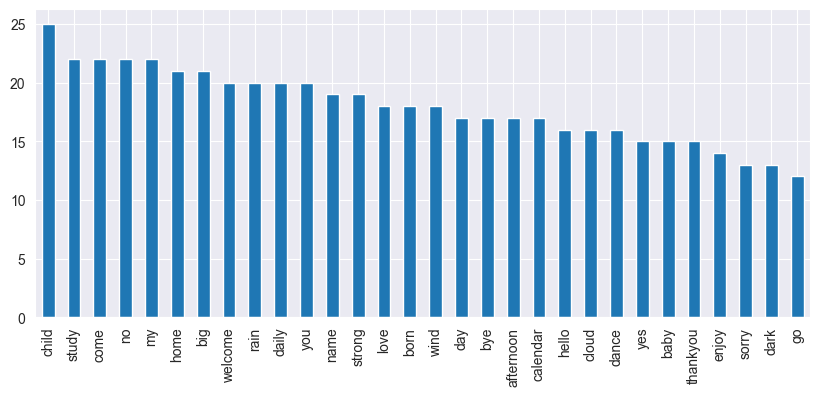

In [191]:
training_data.label_name.value_counts().plot(kind='bar', figsize=(10, 4))

We can see that `child` is the most common label in the training dataset and that `go` is the least common label.

# Imputation
Now let's look for columns that have missing values.

$\color{red}{\text{Should this section be called something with "outlier handling"?}}$

The total amount of missing values in the dataframe:

In [192]:
training_data.isnull().sum().sum()

21

The missing values are in the following columns (along with the missing value count):

$\color{red}{\text{This variable is not defined yet and will crash}}$

In [193]:
columns_with_nulls

positions_mean_7     4
positions_mean_8     4
positions_mean_9     4
positions_mean_14    3
positions_mean_15    3
positions_mean_16    3
dtype: int64

Finally let's print some statistics about each of these columns

$\color{red}{\text{Should we remove this otherwise should we mention something about? I dont think we should data/statistics/graphs unless we mention something about them. Up for debate of course :)}}$

In [194]:
for i in columns_with_nulls.index:
    print(training_data[i].describe())

count    536.000000
mean       0.334582
std        0.057019
min        0.215896
25%        0.299268
50%        0.340286
75%        0.376225
max        0.461244
Name: positions_mean_7, dtype: float64
count    536.000000
mean       2.317620
std        0.130213
min        1.958559
25%        2.233972
50%        2.329261
75%        2.418436
max        2.609596
Name: positions_mean_8, dtype: float64
count    536.000000
mean      -0.038419
std        0.238209
min       -0.529040
25%       -0.229325
50%       -0.054838
75%        0.173653
max        0.399173
Name: positions_mean_9, dtype: float64
count    537.000000
mean       2.255113
std        0.163521
min        1.826848
25%        2.137466
50%        2.252075
75%        2.373724
max        2.619495
Name: positions_mean_14, dtype: float64
count    537.000000
mean       0.080669
std        0.249062
min       -0.441503
25%       -0.121612
50%        0.081936
75%        0.301660
max        0.551752
Name: positions_mean_15, dtype: float64
cou

# Imputation (handling missing data)

As we saw, there are 6 columns that have missing values (3 or 4 missing values each). In order to be able to train a classifier on the data set, these missing values need to be handled.

$\color{red}{\text{To facilitate or for certain methods missing values need to be handled?}}$

## Different methods
There are many different ways of handling missing values and we will explore a few of them here. To get started, let's examine the features/columns that contain missing data. The two visualizations chosen for each of the features/columns are:

- *Histogram* - This will give a good indication of the distribution, for example if it appears to be normal.
- *Boxplot* - We get some additional information from the boxplot showing the median, quartiles as well as outliers.

Let's plot the distributions for the columns with missing data:

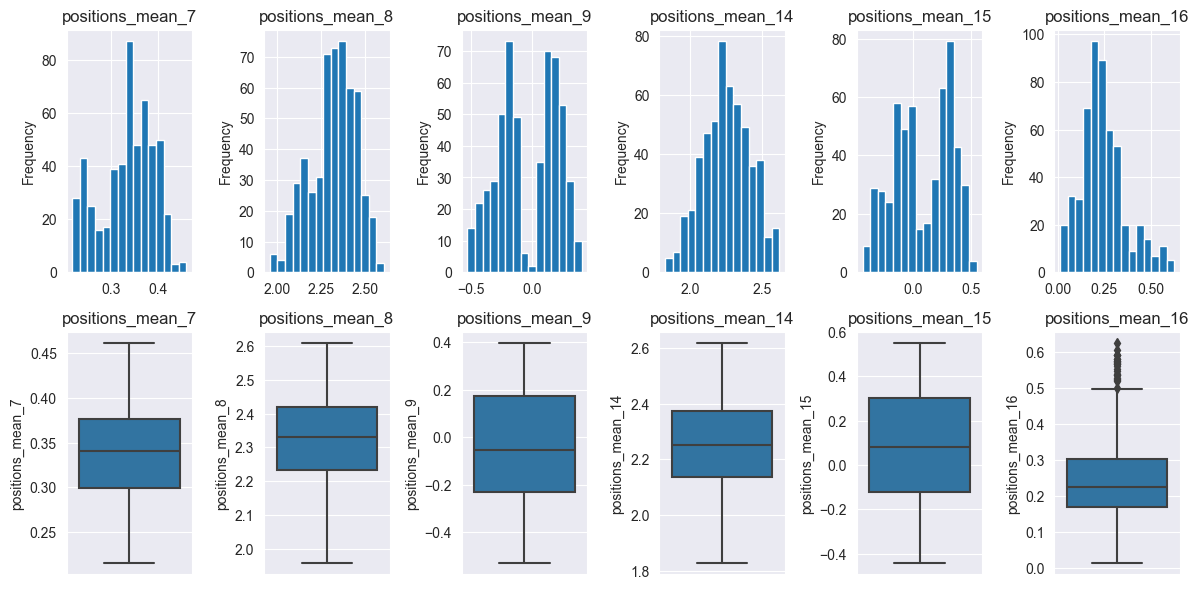

In [195]:
def plot_distributions_for_columns(dataframe, columns):
    # Plot distributions for each of the columns that have missing values
    figure, axes = plt.subplots(2, len(columns), figsize=(12, 6))

    for index, column in enumerate(columns):
        # plot a histogram of the column for the first row
        dataframe[column].plot(kind='hist', ax=axes[0, index], title=column, bins=15)
        # Do a box plot as well
        sns.boxplot(y=dataframe[column], ax=axes[1, index]).set_title(column)

    plt.tight_layout()

plot_distributions_for_columns(training_data, columns_with_nulls.index)

The distributions are quite different, which mean we may need different imputation techniques for each column.
For example, the columns `positions_mean_9` and `positions_mean_15` are clearly not normal distributions and replacing missing values with the mean would likely not be ideal.
For instance in the case of `positions_mean_9` the mean is close to 0 where few other samples are, moreover this feature may even need to be split into two separate features as it appears to be the combination of two gaussian distributions.

Also, we do not know if the missing values themselves have a significance, i.e. we might want to create a separate column to indicate that a missing value is present or not. There are relatively few rows that have missing values, though, that may limit the usefulness of this technique and usefulness will also depend on the classifier used in the end.

$\color{red}{\text{Not sure if I follow, why would a missing value indicator yield if a missing value has significance. Maybe these needs to be elaborated. In addition "this technique" does it refer to a missing lalbel indicator?}}$

$\color{red}{\text{Remove the word "imputation" as removing is not imputation?}}$
For now, we will implement support for the following imputation strategies:
- Replacing with **mean**
- **Drop the rows** containing at least one missing value
- **K-Nearest Neighbour (KNN)** imputation, i.e. use the mean value of the K nearest neighbours

In [196]:
from sklearn.impute import KNNImputer, SimpleImputer


def impute(dataframe, imputer_class, **kwargs):
    imputer = imputer_class(**kwargs)
    dataframe = dataframe.copy()
    dataframe[dataframe.columns] = imputer.fit_transform(dataframe.values)
    return dataframe

# KNN imputation
def impute_knn(dataframe):
    return impute(dataframe, KNNImputer, n_neighbors=2, weights='uniform')

# Drop rows
def impute_drop_rows(dataframe):
    return dataframe.dropna()

# Mean imputation
def impute_mean(dataframe):
    return impute(
        dataframe, SimpleImputer, missing_values=np.nan, strategy='mean'
    )


Let's try to compare the mean and KNN imputation.

In [197]:
columns_null_sum = training_data.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

In [198]:
training_features = training_data[training_feature_columns]
all_na_values = training_features.isna()

First let's execute both imputations individually.
Starting with the mean imputation, the imputed values are the following:

In [199]:
training_data_mean_imputed = impute_mean(training_features)
training_data_mean_imputed.values[all_na_values]

array([ 0.33458168,  2.31761983, -0.03841946,  0.33458168,  2.31761983,
       -0.03841946,  0.33458168,  2.31761983, -0.03841946,  0.33458168,
        2.31761983, -0.03841946,  2.25511306,  0.08066904,  0.24483198,
        2.25511306,  0.08066904,  0.24483198,  2.25511306,  0.08066904,
        0.24483198])

While the KNN-imputed values look like this:

In [200]:
training_data_knn_imputed = impute_knn(training_features)
training_data_knn_imputed.values[all_na_values]

array([ 0.34047311,  2.31943747,  0.28644774,  0.3482031 ,  2.39881444,
       -0.1273677 ,  0.35056898,  2.50631498,  0.39795417,  0.36853525,
        2.44980983, -0.2093955 ,  2.30348019,  0.1777522 ,  0.21750797,
        2.05630751,  0.31015251,  0.20072834,  2.31141073,  0.18122421,
        0.22825797])

## Comparison and visualization
Now it is time to compare the results and visualize the differences on a histogram

$\color{red}{\text{Apart from the "diff" visualization would it be nice to just show the "imputed" data directly as well?}}$

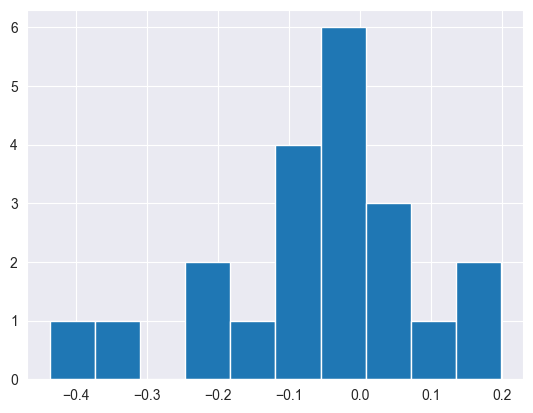

In [201]:
differences = (
    training_data_mean_imputed.values[all_na_values]
    - training_data_knn_imputed.values[all_na_values]
)
plt.hist(differences);

$\color{red}{\text{With the word "huge" what are we refering to? Maybe we could compare with the mean, min, max or something for the whole column?}}$

We can conclude that the differences between the methods are not huge, the mode is close to zero, for most of the missing values the two methods give very similar imputed values.
Now let's look at how the difference is distributed for each column in a boxplot.


$\color{red}{\text{We dont really have so much data here, would it be nicer with just like a swarm/strip plot as I feel the "box" can hide the distribution for small data.}}$


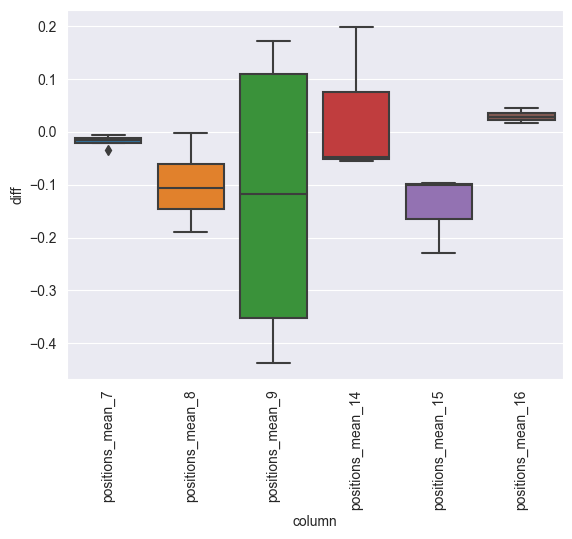

In [202]:
na_rows, na_columns = np.where(all_na_values)
dataframe_differences_columns = pd.DataFrame(
    {'diff': differences, 'column': training_data.columns[na_columns]}
)

axis = sns.boxplot(x='column', data=dataframe_differences_columns, y='diff')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90);

$\color{red}{\text{It would have been interesting to see what mean imputation per label would have given, i.e. what I had in my notebook. If someone have energy for that please compare, im too tired now :)}}$


When comparing the imputed values between the 'mean' and 'KNN' approaches, we see that they produce very similar values for columns `positions_mean_7` and `positions_mean_16` but larger differences by varying degrees for the other columns. The largest (absolute) deviance is for `positions_mean_9`.

$\color{red}{\text{Some of the difference might also be explained by the difference in spread in the different columns?}}$


Based on this it is likely that we may need to employ different imputation techniques depending on the column/feature.

For now, however, let's use KNN imputation and make sure that after the imputation there are no more missing values in our dataset.

$\color{red}{\text{Should we mention that we will bring the 3 different methods over to task 2?}}$


In [203]:
training_data[columns_with_nulls.index] = impute_knn(training_data[columns_with_nulls.index])
assert training_data.isnull().sum().sum() == 0

# Preprocessing

Some classifiers are more sensitive to the range, mean & outliers of the features, such as linear regression models, for example.
In order to be able to train a wide range of classifiers and compare them, we will need to preprocess the data for scaling and outlier treatment.

## Scaling
First we will take a look at how the data looks by feature/column. While the dataset contains a lot of features, we can use a boxplot to get an overview understanding of how the different columns compare.

Let's make a boxplot for every feature to get an overview of how they all relate in terms of range & centre. No need to have labels for the feature names, we just want to show all of them in one plot.

([<matplotlib.axis.XTick at 0x2b85c9760>], [Text(1, 0, '')])

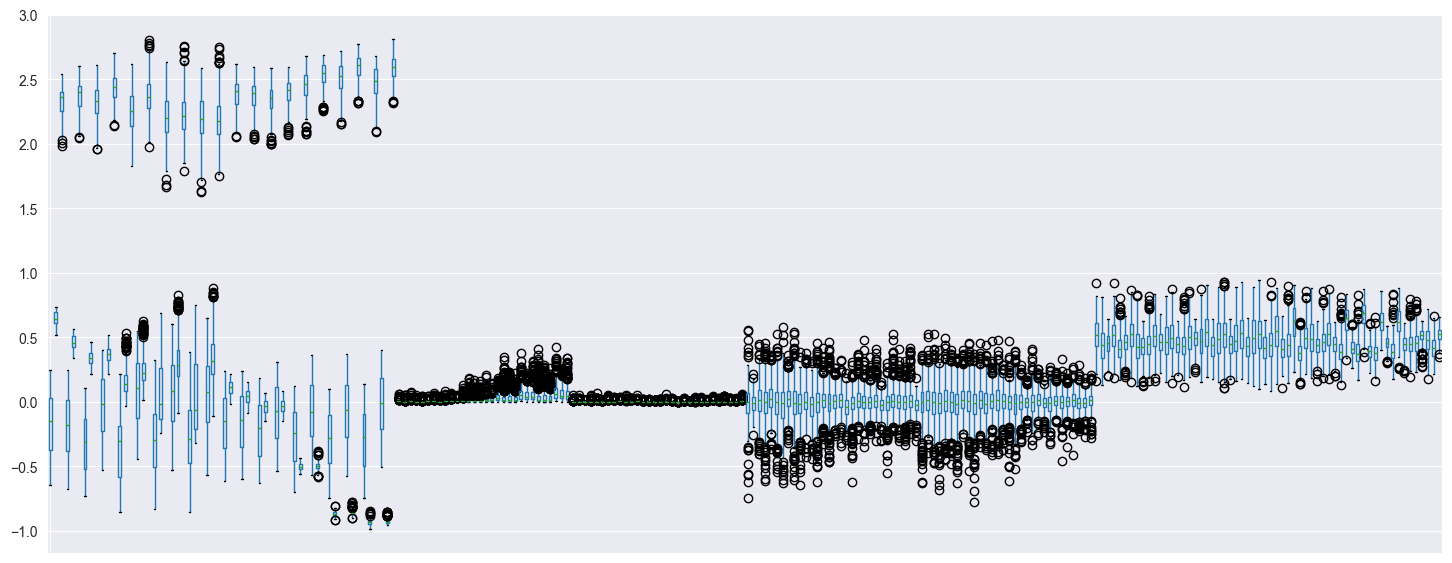

In [204]:
training_features = training_data[training_feature_columns]
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

The columns are clearly not all scaled to the same range and they have different means. There also appear to be quite a few outliers.
As such a scaler that centers the mean and normalizes (scale to the variance) may be suitable. Let's use scikit's `StandardScaler` for this.
$\color{red}{\text{Why would a "standard" scaler be suitable if we have outliers?  
 isnt the contrary true? Or do you mean compared to other scalers such as  
  MinMax scaler? But with the same argument I would say that the RobustScaler  
   would be more suitable.}}$


The `StandardScaler`normalizes the data so that the mean becomes zero, and the variance one, i.e. the scaled dataset follows a *standard* normal distribution.

In [205]:
def preprocess(dataframe):
    scaler = preprocessing.StandardScaler()
    scaled_values = scaler.fit_transform(dataframe.values)
    return pd.DataFrame(scaled_values)


training_data[training_feature_columns] = preprocess(training_features)
training_data.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239,label_name,label_code
0,-1.323633,1.421746,0.733025,-1.232600,1.399904,0.822277,-1.422333,1.262037,0.852106,-1.156943,...,1.047194,-1.135466,0.769486,0.395003,-0.513685,0.020178,2.181665,-1.544711,bye,5
1,1.003039,0.078953,0.794440,1.093898,-0.102009,0.757567,0.931582,0.170309,1.106539,0.927581,...,-1.823802,1.842487,-0.235120,-1.990480,1.426960,-0.876203,-2.053768,1.825020,you,30
2,0.764166,-0.293088,-0.930321,0.915639,-0.371414,-0.985672,0.729450,0.029320,-0.096725,0.844718,...,-0.791318,0.629031,1.002887,0.942327,-1.474741,0.680542,0.412169,-0.811236,thankyou,26
3,0.647555,0.376563,1.137173,0.735317,0.386874,0.780659,0.509463,0.331612,1.451922,0.656212,...,0.884029,-0.850038,-0.147232,-0.450141,0.702284,0.228297,1.694685,-1.276755,name,20
4,1.063069,-0.051572,0.467238,1.133087,-0.178730,0.337967,0.992393,0.076732,0.386219,1.126148,...,0.485131,0.432586,-0.583229,-0.954479,1.125046,-0.296817,1.861857,-1.176475,love,18


Let's take an arbitrary series from the dataset, and check that the mean and variance values match our expectations

In [206]:
training_data['positions_mean_0'].describe()

count    5.400000e+02
mean    -6.579099e-17
std      1.000927e+00
min     -2.041427e+00
25%     -8.478049e-01
50%      1.303612e-01
75%      9.068591e-01
max      1.867119e+00
Name: positions_mean_0, dtype: float64

Looks good, i.e. the mean is about 0 and the standard deviation is around 1. All the columns have now been scaled. Let's rerun the boxplot.

([<matplotlib.axis.XTick at 0x2ba4acb20>], [Text(1, 0, '')])

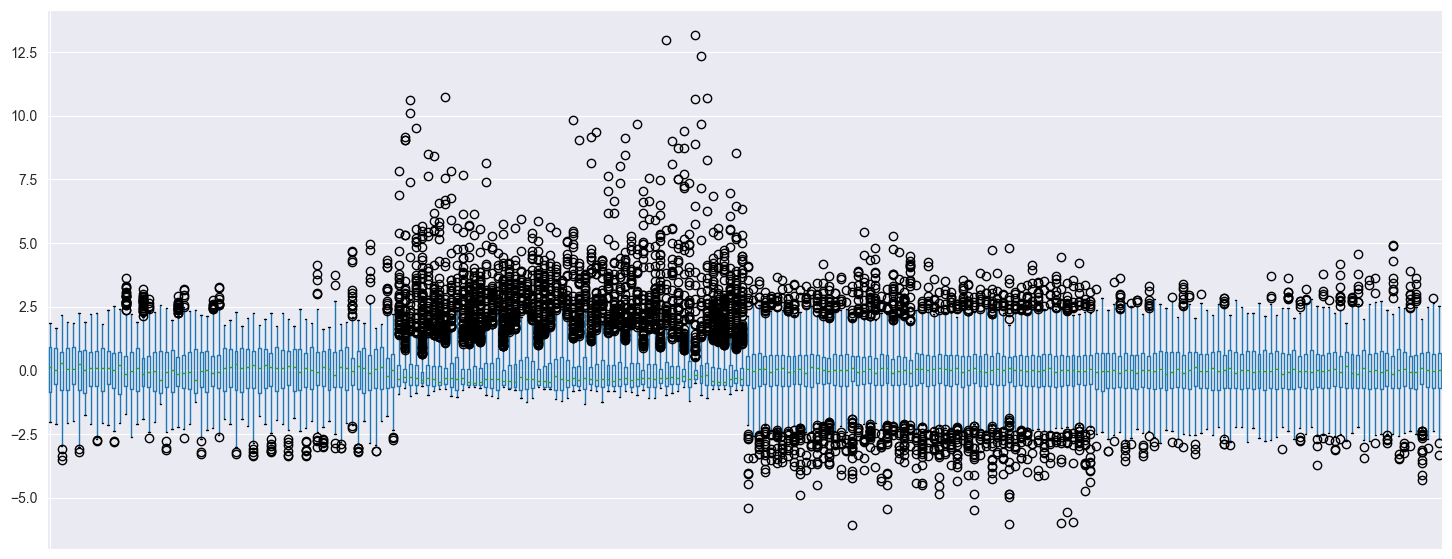

In [207]:
training_features = training_data[training_feature_columns]
training_features.boxplot(figsize=(18,7))
plt.xticks([1], [''])

## Outlier detection
$\color{red}{\text{For me this is in a bit the wrong order. Outlier handling should come before scaling. As you usually want to remove the outlier so they reduce the impact on the scaling.}}$


All columns now have their mean centered at 0 and scaled appropriately. Outliers exist in most of the features, although some have larger amount of outliers than others. There are quite a few way to detect outliers (Source: [Outlier detection methods in Scikit-Learn][https://scikit-learn.org/stable/modules/outlier_detection.html]):
- Isolation forest
- Local outlier factor
- One-class support vector machine (SVM)
- Elliptic envelope

However, let's begin with just identifying the values that are farthest from the mean. Since all the features are scaled to the standard normal distribution, the values are actually equivalent to the Z-scores. It is sensible to identify the values that lie outside of 3$\sigma$ (that is, three times the standard deviation) as outliers.

In [208]:
training_features_outliers_marked = training_features[abs(training_features) <= 3]

Let's see what happens if we just remove the rows involved.

254

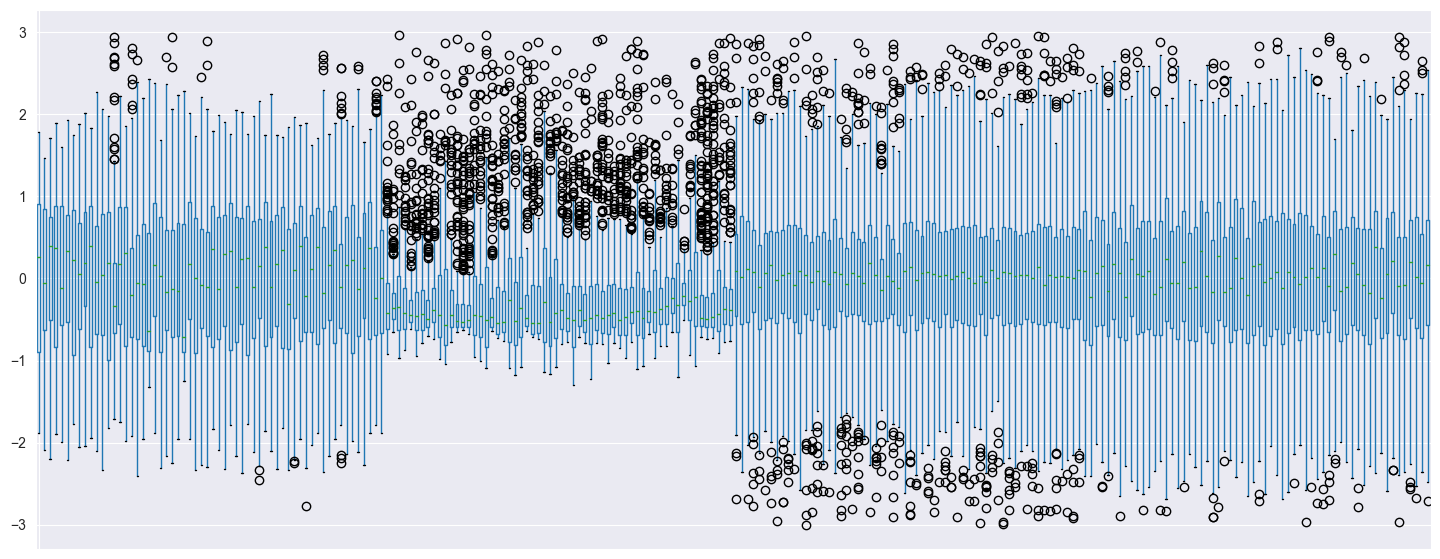

In [209]:
training_features_outliers_removed = training_features_outliers_marked.dropna()
training_features_outliers_removed.boxplot(figsize=(18,7))
plt.xticks([1], [''])
training_features_outliers_removed.shape[0]

The boxplot now looks better, except for the second part (columns 60 to 120), which is `positions_std_i`.
We can also see that if we remove all the rows with at least one detected outlier, we are left with less than half of the original data! This is due to the large number of features.

A more sensible method could be to cap the outliers instead.

In [210]:
for column in training_feature_columns:
    training_data[column][training_data[column] <= -3] = -3
    training_data[column][training_data[column] >= 3] = 3

/var/folders/f3/m7g1c2y17j1czlblqk67n9m80000gq/T/ipykernel_43960/3222609398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column][training_data[column] <= -3] = -3
/var/folders/f3/m7g1c2y17j1czlblqk67n9m80000gq/T/ipykernel_43960/3222609398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column][training_data[column] >= 3] = 3


([<matplotlib.axis.XTick at 0x2959b1f10>], [Text(1, 0, '')])

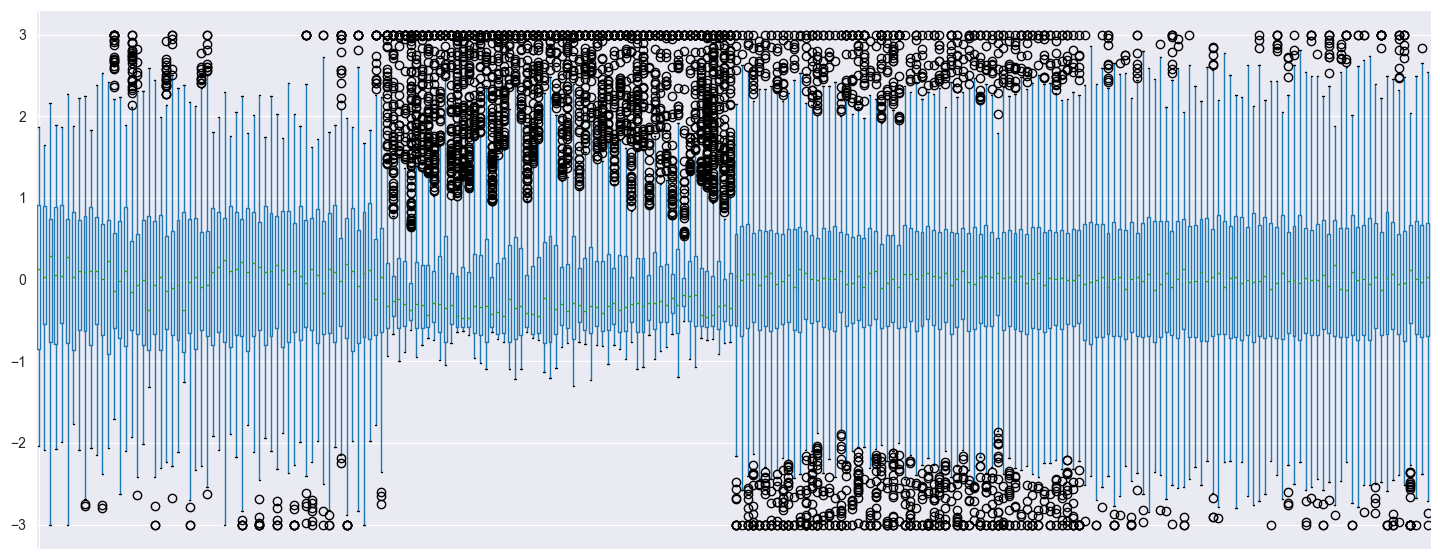

In [211]:
training_features = training_data[training_feature_columns]
training_features.boxplot(figsize=(18,7))
plt.xticks([1], [''])